In [1]:
#Imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data
import names
df = pd.read_csv("htru.csv", names = names.names)

In [3]:
# first 5 
df.head()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
# df to values
df = df.values

In [5]:
# DeepExtraTrees   
import argparse
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/htru.json")   
gc = GCForest(config)

In [6]:
# train test 
from sklearn.cross_validation import train_test_split
y = df[:,8]
X = df[:,0:8]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# count of class
len(np.unique(y_train))

2

In [8]:
        # X_enc is the concatenated predict_proba result of DeepExtraTrees
        
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
 

[ 2018-07-27 21:59:03,677][cascade_classifier.fit_transform] X_groups_train.shape=[(12528, 8)],y_train.shape=(12528,),X_groups_test.shape=[(5370, 8)],y_test.shape=(5370,)
[ 2018-07-27 21:59:03,679][cascade_classifier.fit_transform] group_dims=[8]
[ 2018-07-27 21:59:03,680][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:59:03,681][cascade_classifier.fit_transform] group_ends=[8]
[ 2018-07-27 21:59:03,682][cascade_classifier.fit_transform] X_train.shape=(12528, 8),X_test.shape=(5370, 8)
[ 2018-07-27 21:59:03,684][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(12528, 8), X_cur_test.shape=(5370, 8)
[ 2018-07-27 21:59:04,541][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.09%
[ 2018-07-27 21:59:05,412][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.09%
[ 2018-07-27 21:59:06,267][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_

In [9]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtraTrees = {:.6f} %".format(acc * 100))

[ 2018-07-27 21:59:13,403][cascade_classifier.transform] X_groups_test.shape=[(5370, 8)]
[ 2018-07-27 21:59:13,404][cascade_classifier.transform] group_dims=[8]
[ 2018-07-27 21:59:13,405][cascade_classifier.transform] X_test.shape=(5370, 8)
[ 2018-07-27 21:59:13,407][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(5370, 8)


Test Accuracy of DeepExtraTrees = 98.063315 %


In [10]:
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[4898   28]
 [  76  368]]


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      4926
        1.0       0.93      0.83      0.88       444

avg / total       0.98      0.98      0.98      5370



In [11]:
print("X_train_enc.shape={}, X_test_enc.shape={}".format(X_train_enc.shape, X_test_enc.shape))

X_train_enc.shape=(12528, 2), X_test_enc.shape=(5370, 2)


In [12]:
print("X_train.shape={}, X_test.shape={}".format(X_train.shape, X_test.shape))

X_train.shape=(12528, 8), X_test.shape=(5370, 8)


In [13]:
# Make Data + Estimators
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-27 21:59:15,793][cascade_classifier.transform] X_groups_test.shape=[(5370, 8)]
[ 2018-07-27 21:59:15,795][cascade_classifier.transform] group_dims=[8]
[ 2018-07-27 21:59:15,796][cascade_classifier.transform] X_test.shape=(5370, 8)
[ 2018-07-27 21:59:15,797][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(5370, 8)


In [14]:
print("X_train_enc.shape={}, X_test_enc.shape={}".format(X_train_enc.shape, X_test_enc.shape))

X_train_enc.shape=(12528, 10), X_test_enc.shape=(5370, 10)


In [15]:
# New data
X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-27 21:59:18,233][cascade_classifier.fit_transform] X_groups_train.shape=[(12528, 10)],y_train.shape=(12528,),X_groups_test.shape=[(5370, 10)],y_test.shape=(5370,)
[ 2018-07-27 21:59:18,235][cascade_classifier.fit_transform] group_dims=[10]
[ 2018-07-27 21:59:18,236][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:59:18,237][cascade_classifier.fit_transform] group_ends=[10]
[ 2018-07-27 21:59:18,239][cascade_classifier.fit_transform] X_train.shape=(12528, 10),X_test.shape=(5370, 10)
[ 2018-07-27 21:59:18,240][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(12528, 10), X_cur_test.shape=(5370, 10)
[ 2018-07-27 21:59:18,985][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.09%
[ 2018-07-27 21:59:19,990][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.85%
[ 2018-07-27 21:59:20,964][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator

In [16]:
# predict  data + Es
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtraTrees = {:.6f} %".format(acc * 100))

[ 2018-07-27 21:59:28,156][cascade_classifier.transform] X_groups_test.shape=[(5370, 10)]
[ 2018-07-27 21:59:28,157][cascade_classifier.transform] group_dims=[10]
[ 2018-07-27 21:59:28,159][cascade_classifier.transform] X_test.shape=(5370, 10)
[ 2018-07-27 21:59:28,160][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(5370, 10)


Test Accuracy of DeepExtraTrees = 97.951583 %


In [17]:
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[4888   38]
 [  72  372]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.84      0.87       444

avg / total       0.98      0.98      0.98      5370



In [18]:
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")

[ 2018-07-27 21:59:30,618][cascade_classifier.fit_transform] X_groups_train.shape=[(12528, 10)],y_train.shape=(12528,),X_groups_test.shape=[(5370, 10)],y_test.shape=(5370,)
[ 2018-07-27 21:59:30,619][cascade_classifier.fit_transform] group_dims=[10]
[ 2018-07-27 21:59:30,621][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:59:30,622][cascade_classifier.fit_transform] group_ends=[10]
[ 2018-07-27 21:59:30,623][cascade_classifier.fit_transform] X_train.shape=(12528, 10),X_test.shape=(5370, 10)
[ 2018-07-27 21:59:30,625][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(12528, 10), X_cur_test.shape=(5370, 10)
[ 2018-07-27 21:59:31,418][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.09%
[ 2018-07-27 21:59:32,427][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.85%
[ 2018-07-27 21:59:33,405][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator

('Test Accuracy of DeepExtratTrees = 98.119181 %', 'Layer :', 0)
[[4896   30]
 [  71  373]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.93      0.84      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '9.855', ' seconds')


[ 2018-07-27 21:59:43,774][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.25%
[ 2018-07-27 21:59:44,992][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.17%
[ 2018-07-27 21:59:46,042][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.80%
[ 2018-07-27 21:59:47,045][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.45%
[ 2018-07-27 21:59:48,009][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.29%
[ 2018-07-27 21:59:48,974][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.16%
[ 2018-07-27 21:59:49,936][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.60%
[ 2018-07-27 21:59:50,894][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.68%


('Test Accuracy of DeepExtratTrees = 98.026071 %', 'Layer :', 1)
[[4894   32]
 [  74  370]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.92      0.83      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '10.373', ' seconds')


[ 2018-07-27 21:59:56,232][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.17%
[ 2018-07-27 21:59:57,205][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-27 21:59:57,933][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.64%
[ 2018-07-27 21:59:58,770][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.45%
[ 2018-07-27 21:59:59,602][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.21%
[ 2018-07-27 22:00:00,328][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.16%
[ 2018-07-27 22:00:01,173][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.60%
[ 2018-07-27 22:00:02,147][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.52%


('Test Accuracy of DeepExtratTrees = 98.026071 %', 'Layer :', 2)
[[4891   35]
 [  71  373]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.84      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '8.457', ' seconds')


[ 2018-07-27 22:00:06,865][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.09%
[ 2018-07-27 22:00:07,582][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.41%
[ 2018-07-27 22:00:08,417][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.72%
[ 2018-07-27 22:00:09,289][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.61%
[ 2018-07-27 22:00:10,118][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.53%
[ 2018-07-27 22:00:10,951][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.00%
[ 2018-07-27 22:00:11,781][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-27 22:00:12,622][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.84%


('Test Accuracy of DeepExtratTrees = 98.100559 %', 'Layer :', 3)
[[4893   33]
 [  69  375]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.92      0.84      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '8.291', ' seconds')


[ 2018-07-27 22:00:17,443][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.09%
[ 2018-07-27 22:00:18,274][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-27 22:00:19,109][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.48%
[ 2018-07-27 22:00:19,941][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.61%
[ 2018-07-27 22:00:20,657][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.21%
[ 2018-07-27 22:00:21,518][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.92%
[ 2018-07-27 22:00:22,490][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.92%
[ 2018-07-27 22:00:23,207][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.60%


('Test Accuracy of DeepExtratTrees = 98.081937 %', 'Layer :', 4)
[[4895   31]
 [  72  372]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.92      0.84      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '8.42', ' seconds')


[ 2018-07-27 22:00:28,172][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.01%
[ 2018-07-27 22:00:29,010][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.41%
[ 2018-07-27 22:00:29,858][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.64%
[ 2018-07-27 22:00:30,688][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.37%
[ 2018-07-27 22:00:31,514][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.61%
[ 2018-07-27 22:00:32,347][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.16%
[ 2018-07-27 22:00:33,176][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.76%
[ 2018-07-27 22:00:34,010][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.60%


('Test Accuracy of DeepExtratTrees = 97.988827 %', 'Layer :', 5)
[[4890   36]
 [  72  372]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.84      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '8.363', ' seconds')


[ 2018-07-27 22:00:38,815][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-27 22:00:39,648][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.09%
[ 2018-07-27 22:00:40,365][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.48%
[ 2018-07-27 22:00:41,330][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.37%
[ 2018-07-27 22:00:42,162][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.29%
[ 2018-07-27 22:00:42,880][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.00%
[ 2018-07-27 22:00:43,711][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.76%
[ 2018-07-27 22:00:44,433][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.44%


('Test Accuracy of DeepExtratTrees = 98.081937 %', 'Layer :', 6)
[[4891   35]
 [  68  376]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.85      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '8.13', ' seconds')


[ 2018-07-27 22:00:49,246][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-27 22:00:50,200][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.17%
[ 2018-07-27 22:00:51,186][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.80%
[ 2018-07-27 22:00:52,161][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.53%
[ 2018-07-27 22:00:53,150][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.21%
[ 2018-07-27 22:00:54,118][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.24%
[ 2018-07-27 22:00:55,114][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.76%
[ 2018-07-27 22:00:56,081][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.84%


('Test Accuracy of DeepExtratTrees = 98.156425 %', 'Layer :', 7)
[[4885   41]
 [  58  386]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.87      0.89       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '9.461', ' seconds')


[ 2018-07-27 22:01:00,875][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.01%
[ 2018-07-27 22:01:01,713][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.61%
[ 2018-07-27 22:01:02,544][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.56%
[ 2018-07-27 22:01:03,265][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.37%
[ 2018-07-27 22:01:04,093][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.21%
[ 2018-07-27 22:01:05,060][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.16%
[ 2018-07-27 22:01:05,892][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.60%
[ 2018-07-27 22:01:06,726][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.36%


('Test Accuracy of DeepExtratTrees = 98.026071 %', 'Layer :', 8)
[[4885   41]
 [  65  379]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.85      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '8.249', ' seconds')


[ 2018-07-27 22:01:11,539][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.01%
[ 2018-07-27 22:01:12,370][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.01%
[ 2018-07-27 22:01:13,209][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.48%
[ 2018-07-27 22:01:14,043][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.77%
[ 2018-07-27 22:01:14,876][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.37%
[ 2018-07-27 22:01:15,710][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.92%
[ 2018-07-27 22:01:16,549][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.68%
[ 2018-07-27 22:01:17,382][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.44%


('Test Accuracy of DeepExtratTrees = 98.137803 %', 'Layer :', 9)
[[4887   39]
 [  61  383]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.86      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '8.397', ' seconds')


[ 2018-07-27 22:01:22,219][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-27 22:01:23,054][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.85%
[ 2018-07-27 22:01:23,884][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.56%
[ 2018-07-27 22:01:24,713][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.37%
[ 2018-07-27 22:01:25,426][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.29%
[ 2018-07-27 22:01:26,260][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.84%
[ 2018-07-27 22:01:27,095][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.76%
[ 2018-07-27 22:01:27,927][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.44%


('Test Accuracy of DeepExtratTrees = 98.193669 %', 'Layer :', 10)
[[4895   31]
 [  66  378]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.92      0.85      0.89       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '8.223', ' seconds')


[ 2018-07-27 22:01:32,746][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-27 22:01:33,613][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.33%
[ 2018-07-27 22:01:34,444][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.41%
[ 2018-07-27 22:01:35,275][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.45%
[ 2018-07-27 22:01:35,987][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.45%
[ 2018-07-27 22:01:36,818][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.16%
[ 2018-07-27 22:01:37,648][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.68%
[ 2018-07-27 22:01:38,480][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.08%


('Test Accuracy of DeepExtratTrees = 98.044693 %', 'Layer :', 11)
[[4890   36]
 [  69  375]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.84      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '8.245', ' seconds')


[ 2018-07-27 22:01:43,311][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.69%
[ 2018-07-27 22:01:44,146][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.17%
[ 2018-07-27 22:01:44,860][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.33%
[ 2018-07-27 22:01:45,693][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.53%
[ 2018-07-27 22:01:46,525][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.13%
[ 2018-07-27 22:01:47,358][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.92%
[ 2018-07-27 22:01:48,184][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.76%
[ 2018-07-27 22:01:49,015][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.68%


('Test Accuracy of DeepExtratTrees = 98.081937 %', 'Layer :', 12)
[[4892   34]
 [  69  375]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.92      0.84      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '8.355', ' seconds')


[ 2018-07-27 22:01:54,142][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.09%
[ 2018-07-27 22:01:55,155][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.01%
[ 2018-07-27 22:01:56,120][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.25%
[ 2018-07-27 22:01:56,961][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.45%
[ 2018-07-27 22:01:57,789][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.29%
[ 2018-07-27 22:01:58,618][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.00%
[ 2018-07-27 22:01:59,464][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.92%
[ 2018-07-27 22:02:00,297][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.44%


('Test Accuracy of DeepExtratTrees = 98.137803 %', 'Layer :', 13)
[[4893   33]
 [  67  377]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.92      0.85      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '8.739', ' seconds')


[ 2018-07-27 22:02:05,044][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-27 22:02:05,875][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.09%
[ 2018-07-27 22:02:06,709][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.64%
[ 2018-07-27 22:02:07,678][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.37%
[ 2018-07-27 22:02:08,645][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.53%
[ 2018-07-27 22:02:09,605][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.16%
[ 2018-07-27 22:02:10,575][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-27 22:02:11,549][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.84%


('Test Accuracy of DeepExtratTrees = 97.988827 %', 'Layer :', 14)
[[4887   39]
 [  69  375]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.84      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '9.31', ' seconds')


[ 2018-07-27 22:02:16,812][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.25%
[ 2018-07-27 22:02:17,779][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.09%
[ 2018-07-27 22:02:18,747][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.41%
[ 2018-07-27 22:02:19,756][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.53%
[ 2018-07-27 22:02:20,721][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.29%
[ 2018-07-27 22:02:21,687][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.16%
[ 2018-07-27 22:02:22,662][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.76%
[ 2018-07-27 22:02:23,633][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.76%


('Test Accuracy of DeepExtratTrees = 97.988827 %', 'Layer :', 15)
[[4886   40]
 [  68  376]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.85      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '9.727', ' seconds')


[ 2018-07-27 22:02:28,875][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.01%
[ 2018-07-27 22:02:29,868][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.17%
[ 2018-07-27 22:02:30,829][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.25%
[ 2018-07-27 22:02:31,784][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.29%
[ 2018-07-27 22:02:32,747][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.13%
[ 2018-07-27 22:02:33,713][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.92%
[ 2018-07-27 22:02:34,672][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.60%
[ 2018-07-27 22:02:35,625][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.44%


('Test Accuracy of DeepExtratTrees = 98.081937 %', 'Layer :', 16)
[[4887   39]
 [  64  380]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.86      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '9.649', ' seconds')


[ 2018-07-27 22:02:40,902][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-27 22:02:41,932][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-27 22:02:43,143][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.80%
[ 2018-07-27 22:02:44,325][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.61%
[ 2018-07-27 22:02:45,298][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.45%
[ 2018-07-27 22:02:46,250][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.24%
[ 2018-07-27 22:02:47,220][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.60%
[ 2018-07-27 22:02:48,199][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.44%


('Test Accuracy of DeepExtratTrees = 97.951583 %', 'Layer :', 17)
[[4884   42]
 [  68  376]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.85      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '10.256', ' seconds')


[ 2018-07-27 22:02:53,533][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.01%
[ 2018-07-27 22:02:54,523][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.09%
[ 2018-07-27 22:02:55,503][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.48%
[ 2018-07-27 22:02:56,529][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.37%
[ 2018-07-27 22:02:57,494][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=96.97%
[ 2018-07-27 22:02:58,473][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.16%
[ 2018-07-27 22:02:59,476][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-27 22:03:00,430][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.52%


('Test Accuracy of DeepExtratTrees = 98.063315 %', 'Layer :', 18)
[[4890   36]
 [  68  376]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.85      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '9.826', ' seconds')


[ 2018-07-27 22:03:05,694][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.17%
[ 2018-07-27 22:03:06,648][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.01%
[ 2018-07-27 22:03:07,589][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.56%
[ 2018-07-27 22:03:09,361][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.29%
[ 2018-07-27 22:03:11,245][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.13%
[ 2018-07-27 22:03:12,297][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.32%
[ 2018-07-27 22:03:13,746][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.16%
[ 2018-07-27 22:03:15,353][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.84%


('Test Accuracy of DeepExtratTrees = 98.081937 %', 'Layer :', 19)
[[4892   34]
 [  69  375]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.92      0.84      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '13.415', ' seconds')


('Opt_layer_num =', 10, ' Accuracy =', 98.19, 'Time =', 96.219999999999999)


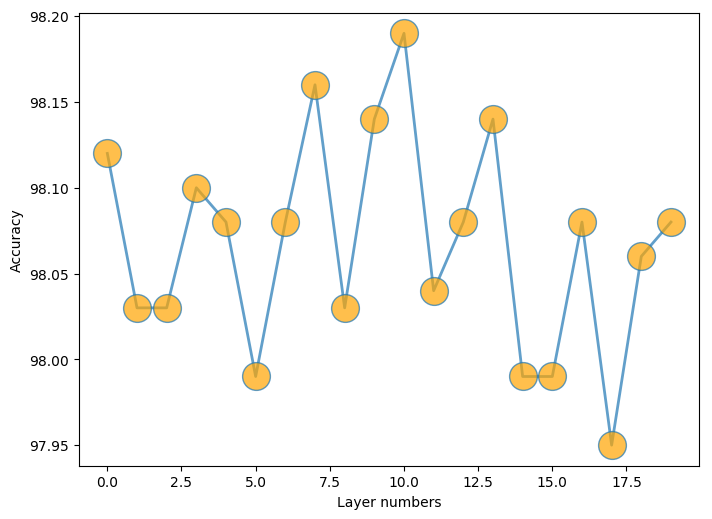

In [19]:
print ("Opt_layer_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Layer numbers')
plt.show()

In [20]:
Accuracy

[98.12,
 98.03,
 98.03,
 98.1,
 98.08,
 97.99,
 98.08,
 98.16,
 98.03,
 98.14,
 98.19,
 98.04,
 98.08,
 98.14,
 97.99,
 97.99,
 98.08,
 97.95,
 98.06,
 98.08]